---
title: "Track Genre Classification"
subtitle: "DSAN 5300 Final Project"
authors: ["Jorge Bris Moreno", "William McGloin", "Kangheng Liu", "Isfar Baset"]
date: last-modified
date-format: long
format:
  html:
    self-contained: true
    toc: true
    code-overflow: wrap
    code-fold: true
---

# Genre Classificaiton for Tracks

Country, EDM, Hip Hop, Latin, Rock, Soul

In [55]:
# import relevant libraries
import numpy as np
import pandas as pd

# load in the data
tracks = pd.read_csv('../data/clean_data/tracks.csv')

# what does this data look like? 
tracks.head(20)

,artist_name,artist_id,album_id,album_release_year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,time_signature,duration_ms,track_name,album_name,key_mode,decade
0,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.787,0.889,-3.125,0.1280,0.009510,0.000322,0.6520,0.677,156.027,49YpGS0rVcRLtiDvx5JQyp,4,172399,Sorry for the Delay,DIRTIESTNASTIEST$UICIDE,D major,2020s
1,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.759,0.833,-5.010,0.0779,0.000260,0.057300,0.1780,0.522,140.026,5dol1hrERJOReznLRJ2VVQ,4,183919,BUCKHEAD,DIRTIESTNASTIEST$UICIDE,B major,2020s
2,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.840,0.934,-3.717,0.1190,0.048400,0.000000,0.0961,0.670,149.994,3QQXpvZd9qmzHZ02wDf2im,4,145842,I Dream of Chrome,DIRTIESTNASTIEST$UICIDE,C major,2020s
3,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.894,0.767,-4.695,0.1370,0.023100,0.000024,0.5740,0.412,144.077,1UsvO5U72YRU8Xnq8Lp14O,4,140288,Champagne Face,DIRTIESTNASTIEST$UICIDE,A# minor,2020s
4,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.780,0.780,-2.857,0.0858,0.001470,0.000000,0.4720,0.446,118.014,2CkpD7gqMXrrpTCJ9TZ0bw,4,177289,The Serpent and the Rainbow,DIRTIESTNASTIEST$UICIDE,C major,2020s
5,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.683,0.969,-3.290,0.1710,0.000275,0.126000,0.9400,0.595,170.017,1xIibyoUvyxwoNqx8quHSz,4,226932,"My Swisher Sweet, But My Sig Sauer",DIRTIESTNASTIEST$UICIDE,C major,2020s
6,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.655,0.782,-6.825,0.3920,0.010500,0.003670,0.1200,0.372,167.003,67IECOggWzBnCERhbOlTRp,4,164723,Center Core Never More,DIRTIESTNASTIEST$UICIDE,G# major,2020s
7,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,3elJRIffdqvypuxoDND2Q3,2022,0.550,0.762,-7.861,0.3200,0.010900,0.001790,0.3980,0.347,200.211,2UbMJbQq6G0TJnmnubgolV,4,162138,Genesis,"Sing Me a Lullaby, My Sweet Temptation",C major,2020s
8,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,3elJRIffdqvypuxoDND2Q3,2022,0.877,0.826,-3.750,0.2060,0.122000,0.000010,0.1040,0.814,75.003,0hPRWztAIbNkt6GcFcLiqF,4,238145,Matte Black,"Sing Me a Lullaby, My Sweet Temptation",A# minor,2020s
9,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,3elJRIffdqvypuxoDND2Q3,2022,0.752,0.807,-4.386,0.1720,0.014600,0.000376,0.8000,0.442,87.507,2gkVweydDn7MmHmqXAlEzk,4,195994,Fucking Your Culture,"Sing Me a Lullaby, My Sweet Temptation",B major,2020s


In [56]:
# read in artist genre info 
artist_genre = pd.read_csv('../data/clean_data/genre_of_artists.csv')

# what does this data look like?
artist_genre.head(20)

,artist_name,genre
0,Green Day,rock
1,Hozier,rock
2,Ms. Lauryn Hill,soul
3,Farruko,latin
4,Red Hot Chili Peppers,rock
5,Swedish House Mafia,edm
6,Major Lazer,edm
7,Travis Scott,hip hop
8,Missy Elliott,soul
9,The Temptations,soul


In [57]:
# left join the two dataframes on the artist name
df = pd.merge(tracks, artist_genre, on='artist_name', how='left')

# remove rows from df with missing genre
df = df.dropna(subset=['genre'])

# what does this data look like?
df.head(20)

,artist_name,artist_id,album_id,album_release_year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,valence,tempo,track_id,time_signature,duration_ms,track_name,album_name,key_mode,decade,genre
0,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.787,0.889,-3.125,0.1280,0.009510,0.000322,...,0.677,156.027,49YpGS0rVcRLtiDvx5JQyp,4,172399,Sorry for the Delay,DIRTIESTNASTIEST$UICIDE,D major,2020s,hip hop
1,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.759,0.833,-5.010,0.0779,0.000260,0.057300,...,0.522,140.026,5dol1hrERJOReznLRJ2VVQ,4,183919,BUCKHEAD,DIRTIESTNASTIEST$UICIDE,B major,2020s,hip hop
2,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.840,0.934,-3.717,0.1190,0.048400,0.000000,...,0.670,149.994,3QQXpvZd9qmzHZ02wDf2im,4,145842,I Dream of Chrome,DIRTIESTNASTIEST$UICIDE,C major,2020s,hip hop
3,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.894,0.767,-4.695,0.1370,0.023100,0.000024,...,0.412,144.077,1UsvO5U72YRU8Xnq8Lp14O,4,140288,Champagne Face,DIRTIESTNASTIEST$UICIDE,A# minor,2020s,hip hop
4,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.780,0.780,-2.857,0.0858,0.001470,0.000000,...,0.446,118.014,2CkpD7gqMXrrpTCJ9TZ0bw,4,177289,The Serpent and the Rainbow,DIRTIESTNASTIEST$UICIDE,C major,2020s,hip hop
5,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.683,0.969,-3.290,0.1710,0.000275,0.126000,...,0.595,170.017,1xIibyoUvyxwoNqx8quHSz,4,226932,"My Swisher Sweet, But My Sig Sauer",DIRTIESTNASTIEST$UICIDE,C major,2020s,hip hop
6,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.655,0.782,-6.825,0.3920,0.010500,0.003670,...,0.372,167.003,67IECOggWzBnCERhbOlTRp,4,164723,Center Core Never More,DIRTIESTNASTIEST$UICIDE,G# major,2020s,hip hop
7,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,3elJRIffdqvypuxoDND2Q3,2022,0.550,0.762,-7.861,0.3200,0.010900,0.001790,...,0.347,200.211,2UbMJbQq6G0TJnmnubgolV,4,162138,Genesis,"Sing Me a Lullaby, My Sweet Temptation",C major,2020s,hip hop
8,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,3elJRIffdqvypuxoDND2Q3,2022,0.877,0.826,-3.750,0.2060,0.122000,0.000010,...,0.814,75.003,0hPRWztAIbNkt6GcFcLiqF,4,238145,Matte Black,"Sing Me a Lullaby, My Sweet Temptation",A# minor,2020s,hip hop
9,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,3elJRIffdqvypuxoDND2Q3,2022,0.752,0.807,-4.386,0.1720,0.014600,0.000376,...,0.442,87.507,2gkVweydDn7MmHmqXAlEzk,4,195994,Fucking Your Culture,"Sing Me a Lullaby, My Sweet Temptation",B major,2020s,hip hop


In [58]:
# does the number of artists in the original data equal the number of artists in the merged data?
len(df.artist_name.unique()) == len(artist_genre)

True

In [59]:
tracks = df

# drop columns that will not be used in our models for obvious reasons 
tracks = tracks.drop(['artist_name', 'artist_id', 'album_id', 'album_release_year', 'track_id', 'track_name', 'album_name', 'decade'], axis=1)

# split 'key_mode' column
tracks['key'] = tracks['key_mode'].apply(lambda x: x.split(' ')[0])
tracks['mode'] = tracks['key_mode'].apply(lambda x: x.split(' ')[1])

# drop key_mode
tracks.drop('key_mode', axis=1, inplace=True)
# covert mode into binary
tracks['mode'] = tracks['mode'].apply(lambda x: 1 if x == 'major' else 0)

# convert key into numerical
key_dict = {'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}
tracks['key'] = tracks['key'].apply(lambda x: key_dict[x])

# what does that data look like? 
tracks.head(20)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,genre,key,mode
0,0.787,0.889,-3.125,0.1280,0.009510,0.000322,0.6520,0.677,156.027,4,172399,hip hop,2,1
1,0.759,0.833,-5.010,0.0779,0.000260,0.057300,0.1780,0.522,140.026,4,183919,hip hop,11,1
2,0.840,0.934,-3.717,0.1190,0.048400,0.000000,0.0961,0.670,149.994,4,145842,hip hop,0,1
3,0.894,0.767,-4.695,0.1370,0.023100,0.000024,0.5740,0.412,144.077,4,140288,hip hop,10,0
4,0.780,0.780,-2.857,0.0858,0.001470,0.000000,0.4720,0.446,118.014,4,177289,hip hop,0,1
5,0.683,0.969,-3.290,0.1710,0.000275,0.126000,0.9400,0.595,170.017,4,226932,hip hop,0,1
6,0.655,0.782,-6.825,0.3920,0.010500,0.003670,0.1200,0.372,167.003,4,164723,hip hop,8,1
7,0.550,0.762,-7.861,0.3200,0.010900,0.001790,0.3980,0.347,200.211,4,162138,hip hop,0,1
8,0.877,0.826,-3.750,0.2060,0.122000,0.000010,0.1040,0.814,75.003,4,238145,hip hop,10,0
9,0.752,0.807,-4.386,0.1720,0.014600,0.000376,0.8000,0.442,87.507,4,195994,hip hop,11,1


In [60]:
tracks['genre'].value_counts()

genre
hip hop    7980
country    7461
soul       6773
rock       6734
latin      4482
edm        3899
Name: count, dtype: int64

## Classification Data Prep

In [61]:
# convert key and mode to factors
tracks['key'] = tracks['key'].astype('category')
tracks['mode'] = tracks['mode'].astype('category')

# rename mode to major
tracks.rename(columns={'mode': 'major'}, inplace=True)

# what does the data look like now?
tracks.head(20)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,genre,key,major
0,0.787,0.889,-3.125,0.1280,0.009510,0.000322,0.6520,0.677,156.027,4,172399,hip hop,2,1
1,0.759,0.833,-5.010,0.0779,0.000260,0.057300,0.1780,0.522,140.026,4,183919,hip hop,11,1
2,0.840,0.934,-3.717,0.1190,0.048400,0.000000,0.0961,0.670,149.994,4,145842,hip hop,0,1
3,0.894,0.767,-4.695,0.1370,0.023100,0.000024,0.5740,0.412,144.077,4,140288,hip hop,10,0
4,0.780,0.780,-2.857,0.0858,0.001470,0.000000,0.4720,0.446,118.014,4,177289,hip hop,0,1
5,0.683,0.969,-3.290,0.1710,0.000275,0.126000,0.9400,0.595,170.017,4,226932,hip hop,0,1
6,0.655,0.782,-6.825,0.3920,0.010500,0.003670,0.1200,0.372,167.003,4,164723,hip hop,8,1
7,0.550,0.762,-7.861,0.3200,0.010900,0.001790,0.3980,0.347,200.211,4,162138,hip hop,0,1
8,0.877,0.826,-3.750,0.2060,0.122000,0.000010,0.1040,0.814,75.003,4,238145,hip hop,10,0
9,0.752,0.807,-4.386,0.1720,0.014600,0.000376,0.8000,0.442,87.507,4,195994,hip hop,11,1


In [62]:
# find all numerical columns and normalize the numerical columns into a bracket from [0,1]
numerical_columns = tracks.select_dtypes(include=[np.number]).columns
tracks[numerical_columns] = (tracks[numerical_columns] - tracks[numerical_columns].min()) / (tracks[numerical_columns].max() - tracks[numerical_columns].min())

# convert genre to category
tracks['genre'] = tracks['genre'].astype('category')

# what does the data look like now?
tracks.head(20)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,genre,key,major
0,0.798174,0.889,0.926877,0.133472,0.009548,0.000324,0.657921,0.677,0.642179,0.8,0.035567,hip hop,2,1
1,0.769777,0.833,0.896157,0.081230,0.000261,0.057704,0.179617,0.522,0.576322,0.8,0.038001,hip hop,11,1
2,0.851927,0.934,0.917229,0.124088,0.048594,0.000000,0.096973,0.670,0.617348,0.8,0.029957,hip hop,0,1
3,0.906694,0.767,0.901291,0.142857,0.023193,0.000024,0.579213,0.412,0.592995,0.8,0.028784,hip hop,10,0
4,0.791075,0.780,0.931244,0.089468,0.001476,0.000000,0.476287,0.446,0.485724,0.8,0.036600,hip hop,0,1
5,0.692698,0.969,0.924188,0.178311,0.000276,0.126888,0.948537,0.595,0.699759,0.8,0.047087,hip hop,0,1
6,0.664300,0.782,0.866579,0.408759,0.010542,0.003696,0.121090,0.372,0.687354,0.8,0.033946,hip hop,8,1
7,0.557809,0.762,0.849695,0.333681,0.010944,0.001803,0.401615,0.347,0.824032,0.8,0.033400,hip hop,0,1
8,0.889452,0.826,0.916691,0.214807,0.122490,0.000011,0.104945,0.814,0.308699,0.8,0.049455,hip hop,10,0
9,0.762677,0.807,0.906326,0.179353,0.014659,0.000379,0.807265,0.442,0.360163,0.8,0.040551,hip hop,11,1


In [63]:
tracks.shape

(37329, 14)

In [64]:
# split the data into training and testing sets, with 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(tracks, test_size=0.2, random_state=37)

# split the data into features and target, target being three columns ['genre1','genre2','genre3']
X_train = train.drop(['genre'], axis=1)
y_train = train[['genre']]
X_test = test.drop(['genre'], axis=1)
y_test = test[['genre']]

print("Shape of X_train: ", X_train.shape, "\nShape of X_test: ", X_test.shape, "\nShape of y_train: ", y_train.shape, "\nShape of y_test: ", y_test.shape)

Shape of X_train:  (29863, 13) 
Shape of X_test:  (7466, 13) 
Shape of y_train:  (29863, 1) 
Shape of y_test:  (7466, 1)


In [65]:
train['genre'].value_counts()

genre
hip hop    6449
country    5909
soul       5414
rock       5358
latin      3633
edm        3100
Name: count, dtype: int64

In [66]:
from sklearn.utils import resample

# Combine the features and target for training set
train_df = pd.concat([X_train, y_train], axis=1)

# sample the training dataset classes
resampled_df_list = []
min_class_size = int(y_train.value_counts().min())

for genre_value, group in train_df.groupby('genre'):
    resampled_group = resample(group,
                               replace=False,
                               n_samples=min_class_size,
                               random_state=37)
    resampled_df_list.append(resampled_group)

# Combine the resampled training dataframes
balanced_train_df = pd.concat(resampled_df_list)

# Print the new class distribution
print("New class distribution after resampling:")
print(balanced_train_df['genre'].value_counts())
print("Balanced dataset created and saved successfully without using SMOTE.")

New class distribution after resampling:
genre
country    3100
edm        3100
hip hop    3100
latin      3100
rock       3100
soul       3100
Name: count, dtype: int64
Balanced dataset created and saved successfully without using SMOTE.


/var/folders/lb/dk54cbx965z7nj61zps2fzr00000gn/T/ipykernel_76987/2576376208.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for genre_value, group in train_df.groupby('genre'):


In [67]:
X_train = balanced_train_df.drop(['genre'], axis=1)
y_train = balanced_train_df[['genre']]

In [68]:
# value counts of genre in the training data
y_train['genre'].value_counts()

genre
country    3100
edm        3100
hip hop    3100
latin      3100
rock       3100
soul       3100
Name: count, dtype: int64

In [69]:
# value counts of genre in test data
y_test['genre'].value_counts()

genre
country    1552
hip hop    1531
rock       1376
soul       1359
latin       849
edm         799
Name: count, dtype: int64

In [70]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
train_target_encoded = label_encoder.fit_transform(y_train)
test_target_encoded = label_encoder.fit_transform(y_test)

/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/williammcgloin/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Logistic Regression using OVR

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Flatten the target arrays to avoid DataConversionWarnings
y_train_flat = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test_flat = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Adding the solver here for completeness
    'max_iter': [10000]  # Increase max_iter to avoid convergence warnings
}

# Initialize the Logistic Regression model
log_reg_ovr = LogisticRegression(multi_class='ovr')

# Create GridSearchCV with the logistic regression estimator and the parameter grid
grid_search = GridSearchCV(log_reg_ovr, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train_flat)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
accuracy = accuracy_score(y_test_flat, y_pred)
classification_report_result = classification_report(y_test_flat, y_pred)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Best Parameters: {'C': 3792.690190732246, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.5137958746316635
Classification Report:
              precision    recall  f1-score   support

     country       0.52      0.54      0.53      1552
         edm       0.46      0.56      0.51       799
     hip hop       0.67      0.63      0.65      1531
       latin       0.41      0.55      0.47       849
        rock       0.49      0.41      0.45      1376
        soul       0.47      0.41      0.44      1359

    accuracy                           0.51      7466
   macro avg       0.51      0.52      0.51      7466
weighted avg       0.52      0.51      0.51      7466



Text(0.5, 1.0, 'Training Confusion Matrix')

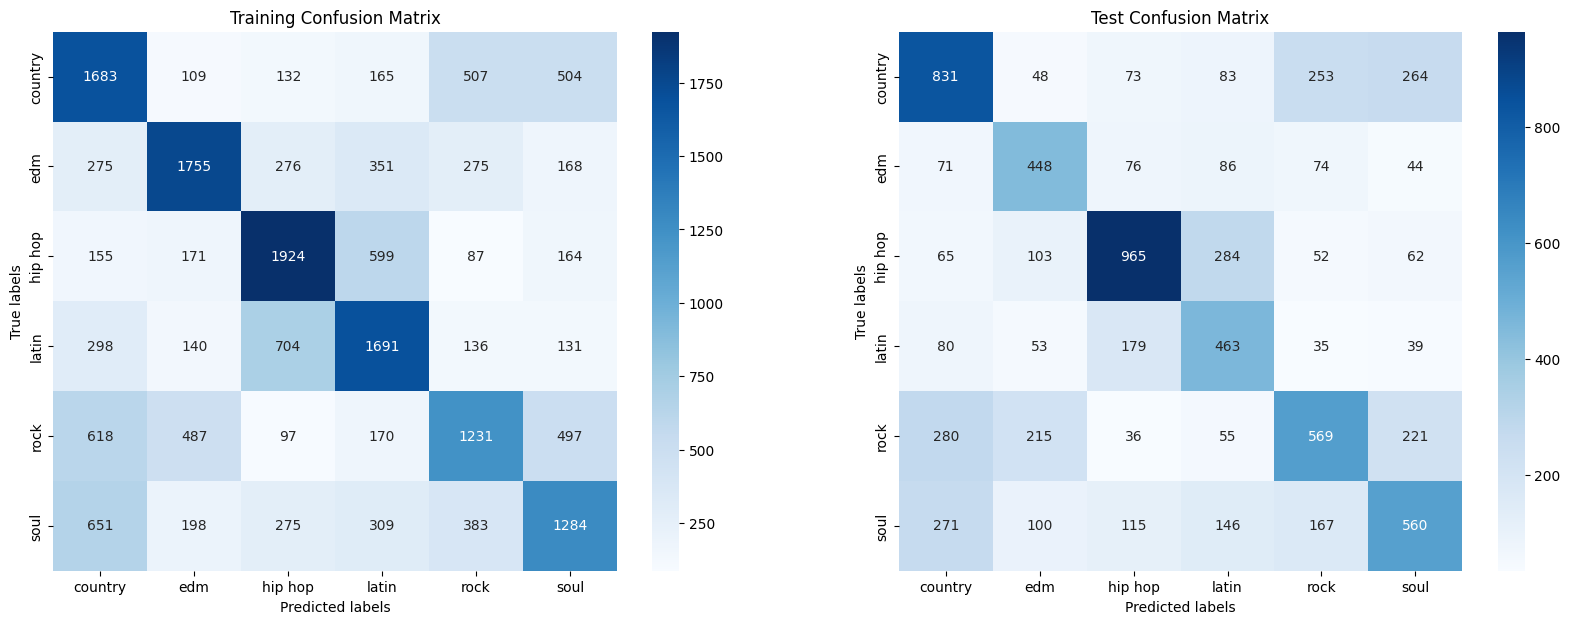

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_train = best_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## SVM

In [73]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Added different kernels to try
    'gamma': ['scale', 'auto']  # Gamma is a parameter for non-linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
}

# Initialize the SVM model
svm_model = SVC(max_iter=10000, decision_function_shape='ovr')

# Create GridSearchCV with the SVM estimator and the parameter grid
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train_flat)

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Predict on the test data with the best model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_svm = accuracy_score(y_test_flat, y_pred_svm)
classification_report_svm = classification_report(y_test_flat, y_pred_svm)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Test Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_report_svm)

Best Parameters: {'C': 78.47599703514607, 'gamma': 'auto', 'kernel': 'rbf'}
Test Accuracy: 0.5488882935976427
SVM Classification Report:
              precision    recall  f1-score   support

     country       0.52      0.65      0.58      1552
         edm       0.49      0.62      0.55       799
     hip hop       0.70      0.66      0.68      1531
       latin       0.46      0.55      0.50       849
        rock       0.57      0.41      0.48      1376
        soul       0.52      0.41      0.46      1359

    accuracy                           0.55      7466
   macro avg       0.54      0.55      0.54      7466
weighted avg       0.56      0.55      0.55      7466



Text(0.5, 1.0, 'Training Confusion Matrix')

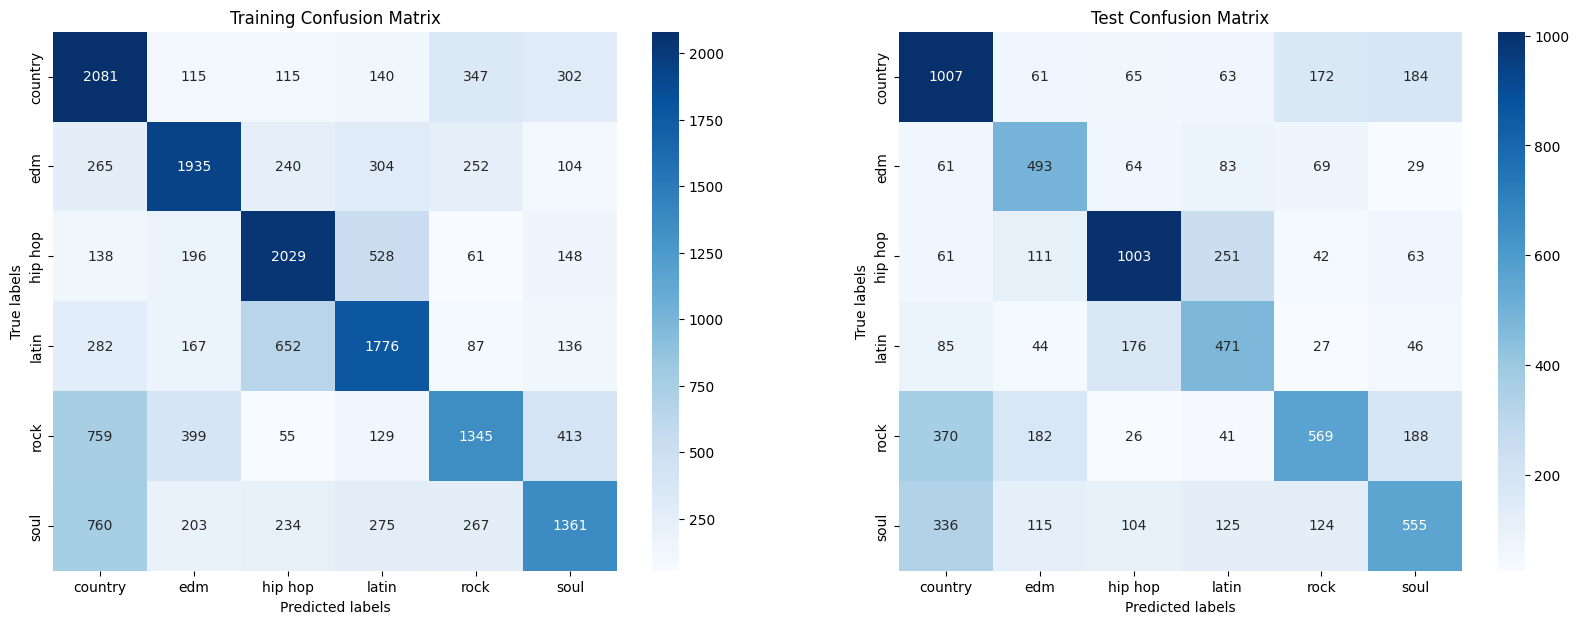

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_svm_train = best_svm_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_svm_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred_svm)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## Neural Network

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=128, dropout_rate=0.05, regularization_rate=0.01, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],), 
                    kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dropout(dropout_rate))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dense(7, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=1, neurons=None, dropout_rate=None, regularization_rate=None, hidden_layers=None, batch_size=None, epochs=None)

param_grid = {
    'neurons': [32, 64, 128],
    'dropout_rate': [0.05, 0.1, 0.2],
    'regularization_rate': [0.01, 0.001],
    'hidden_layers': [1, 2, 3],
    'batch_size': [32, 64, 128],
    'epochs': [50]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, train_target_encoded)


In [76]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.544516 using {'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 50, 'hidden_layers': 2, 'neurons': 128, 'regularization_rate': 0.001}


Best parameters found:  {'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 50, 'hidden_layers': 2, 'neurons': 128, 'regularization_rate': 0.001}


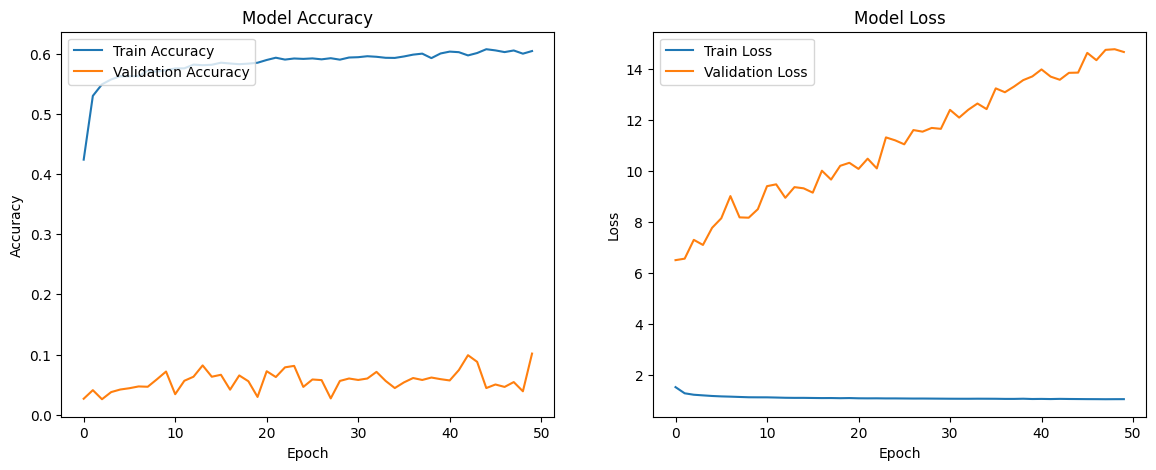

In [77]:
import matplotlib.pyplot as plt

# Retrieve the best hyperparameters
best_params = grid_result.best_params_
print("Best parameters found: ", best_params)

# Create a new model with the best parameters
best_model = create_model(
    neurons=best_params['neurons'],
    dropout_rate=best_params['dropout_rate'],
    regularization_rate=best_params['regularization_rate'],
    hidden_layers=best_params['hidden_layers']
)

# Train the best model
history = best_model.fit(
    X_train, 
    train_target_encoded, 
    epochs=best_params['epochs'], 
    batch_size=best_params['batch_size'],
    validation_split=0.2,  # Use 20% of the data for validation
    verbose=0  # Turn off training log
)

# Plotting the training and validation accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


In [78]:
# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, test_target_encoded, verbose=0)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.49182963371276855


## Random Forest

In [79]:
# Perform Random Forest Classification on the artist dataset
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with the Random Forest estimator and the parameter grid
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_rf.fit(X_train, train_target_encoded)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [80]:
from sklearn.metrics import accuracy_score

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Predict on the test data with the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_rf = accuracy_score(test_target_encoded, y_pred_rf)

Best Parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Test Accuracy: 0.6210822394856683
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      1552
           1       0.56      0.70      0.62       799
           2       0.72      0.70      0.71      1531
           3       0.55      0.59      0.57       849
           4       0.64      0.54      0.59      1376
           5       0.57      0.55      0.56      1359

    accuracy                           0.62      7466
   macro avg       0.61      0.62      0.62      7466
weighted avg       0.62      0.62      0.62      7466



Text(0.5, 1.0, 'Training Confusion Matrix')

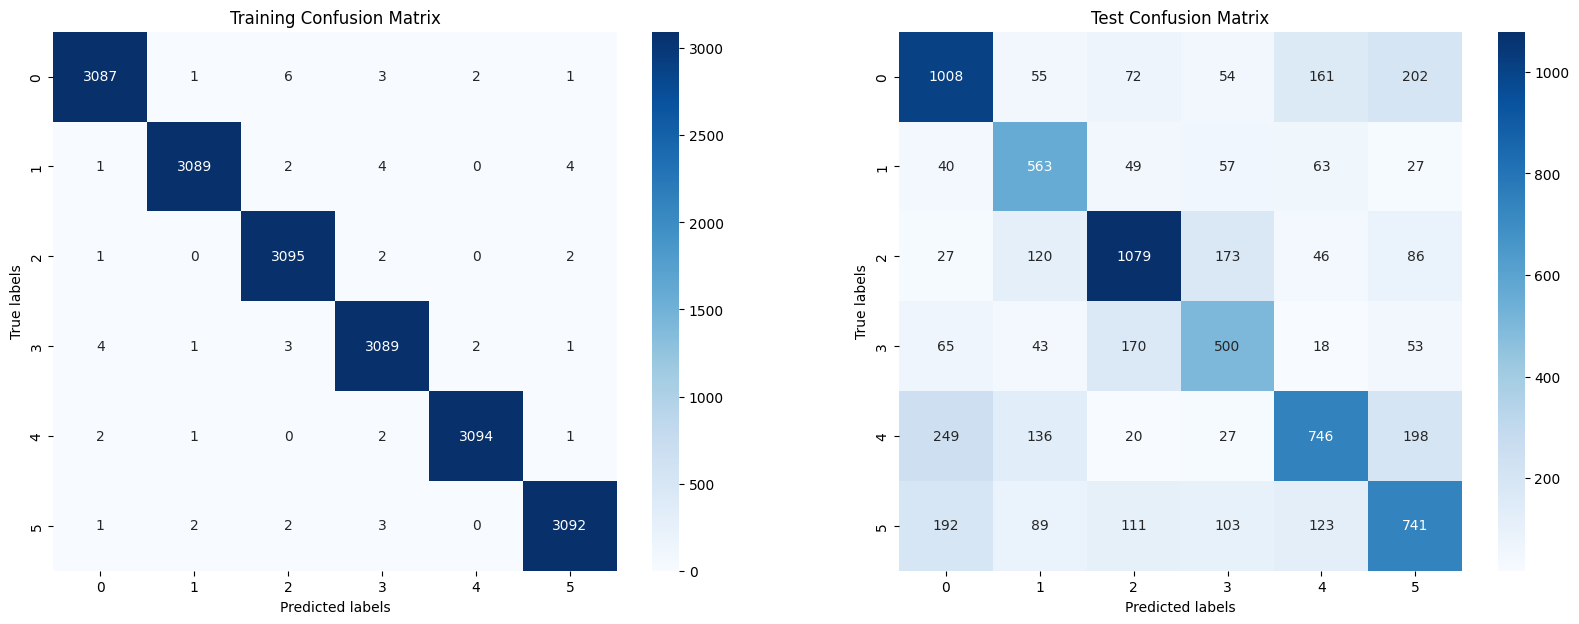

In [81]:
from sklearn.metrics import classification_report

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Test Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(test_target_encoded, y_pred_rf))

# draw confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# train confusion matrix
cm_train = confusion_matrix(train_target_encoded, grid_search_rf.predict(X_train))

# test confusion matrix
cm_test = confusion_matrix(test_target_encoded, y_pred_rf)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(test_target_encoded)), yticklabels=sorted(set(test_target_encoded)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(train_target_encoded)), yticklabels=sorted(set(train_target_encoded)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')


## XGBoost 

In [82]:
# Encode categorical 'genre' for both training and testing sets
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Change the key and major columns to numerical for input
X_train['key'] = X_train['key'].astype('int')
X_train['major'] = X_train['major'].astype('int')
X_test['key'] = X_test['key'].astype('int')
X_test['major'] = X_test['major'].astype('int')


In [83]:
import xgboost as xgb

# Setting up the XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',  # Use for multi-class classification
    num_class=len(label_encoder.classes_),  # Specify number of classes
    random_state=137
)

# Training the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=6,
              num_parallel_tree=None, ...)

In [84]:
from sklearn.metrics import accuracy_score, classification_report

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6167961425127243
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64      1552
           1       0.57      0.71      0.63       799
           2       0.71      0.70      0.70      1531
           3       0.53      0.57      0.55       849
           4       0.65      0.53      0.58      1376
           5       0.56      0.56      0.56      1359

    accuracy                           0.62      7466
   macro avg       0.61      0.62      0.61      7466
weighted avg       0.62      0.62      0.62      7466



In [85]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Configuring the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

# Running grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_chil

In [86]:
# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Making predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluating the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print the results
print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", test_classification_report)


Test Set Accuracy: 0.6303241360835788
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.66      0.65      1552
           1       0.59      0.72      0.65       799
           2       0.73      0.70      0.71      1531
           3       0.55      0.59      0.57       849
           4       0.65      0.56      0.60      1376
           5       0.58      0.56      0.57      1359

    accuracy                           0.63      7466
   macro avg       0.62      0.63      0.63      7466
weighted avg       0.63      0.63      0.63      7466



## Comparison of the models (CHANGE AT END)

7 classes -> random guess 14.29% accuracy

- Logistic Regression
    - Test Accuracy: 0.5137958746316635
    - Time: 6m 3.89s
- SVM
    - Test Accuracy: 0.5488882935976427
    - Time: 80m 4.4s
- Neural Network
    - Train Accuracy: 0.544516
    - Test Accuracy: 0.49182963371276855
    - Time: 44m-ish?
- Random Forest
    - Test Accuracy: 0.6167961425127243
    - Time: 46m 49.8s
- XGBoost
    - Test Accuracy: 0.6303241360835788
    - Time: 2m 51.4s